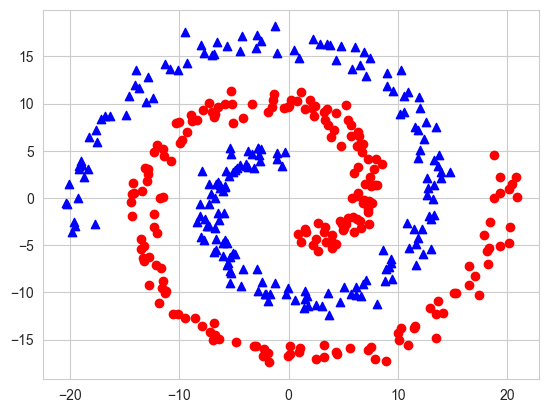

In [136]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.pyplot import figure


N = 200
theta = np.linspace(-1.3, 6.5, 200)

r_a = 2*theta + pi + 4
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N,2) * 0.8

r_b = -2*theta - pi - 4
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N,2) * 0.8

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("train.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1], c='red')
plt.scatter(x_b[:,0],x_b[:,1], c='blue', marker='^')
plt.show()

In [137]:
df = pd.read_csv('train.csv')
df

,x,y,label
0,20.80383,2.21012,0.0
1,2.21082,-5.00234,0.0
2,-4.41196,3.47578,1.0
3,0.08282,-16.47804,0.0
4,-6.02861,-4.75242,1.0
...,...,...,...
395,12.68255,0.36421,1.0
396,-16.36958,8.69849,1.0
397,17.42797,-10.32544,0.0
398,7.89062,1.34332,0.0


In [138]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [140]:
def plot_confusion_matrix(cm, classes, lambda_value,
                          normalize=False,
                          cmap='gray_r',
                          linecolor='k'):

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                xticklabels=classes, yticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title('Confusion Matrix\nlambda = ' + str(lambda_value))
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
    plt.show()

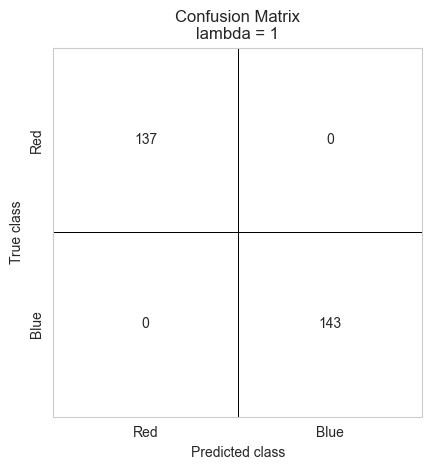

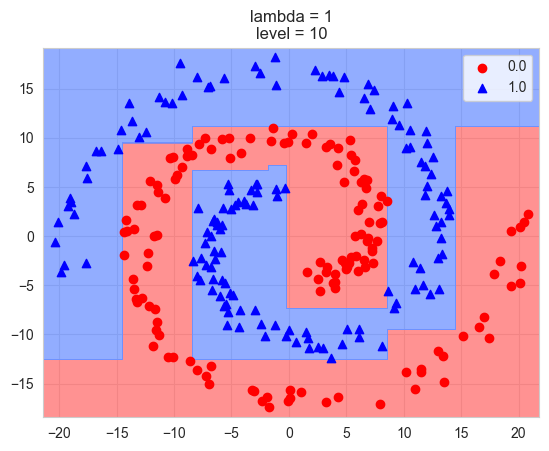

Accuracy:100.0%


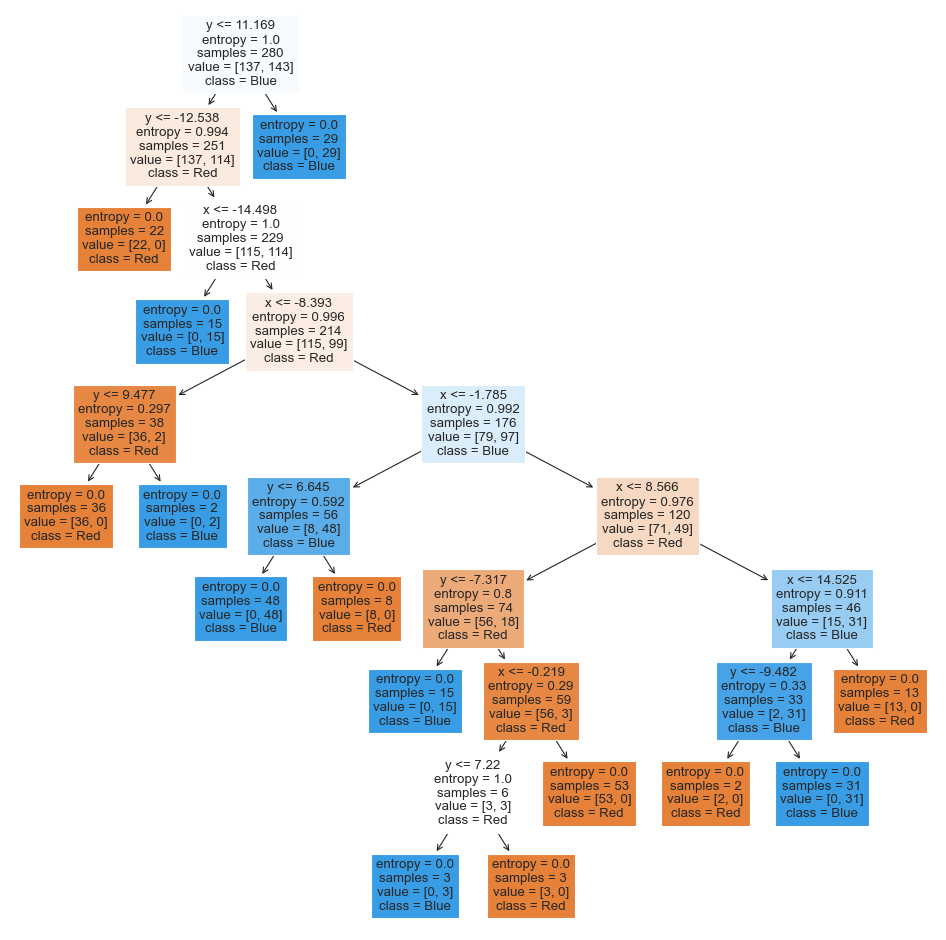

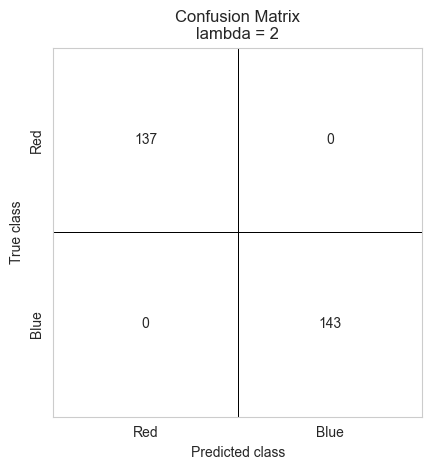

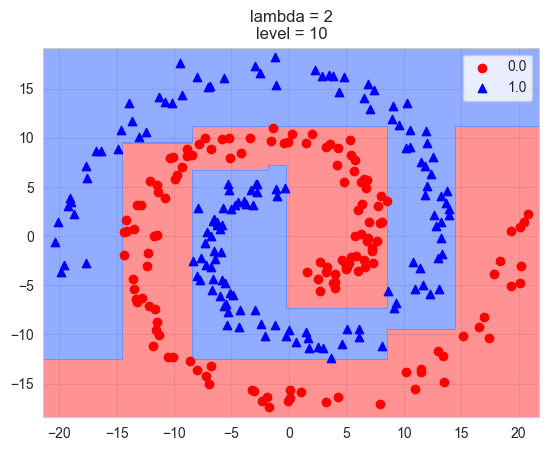

Accuracy:100.0%


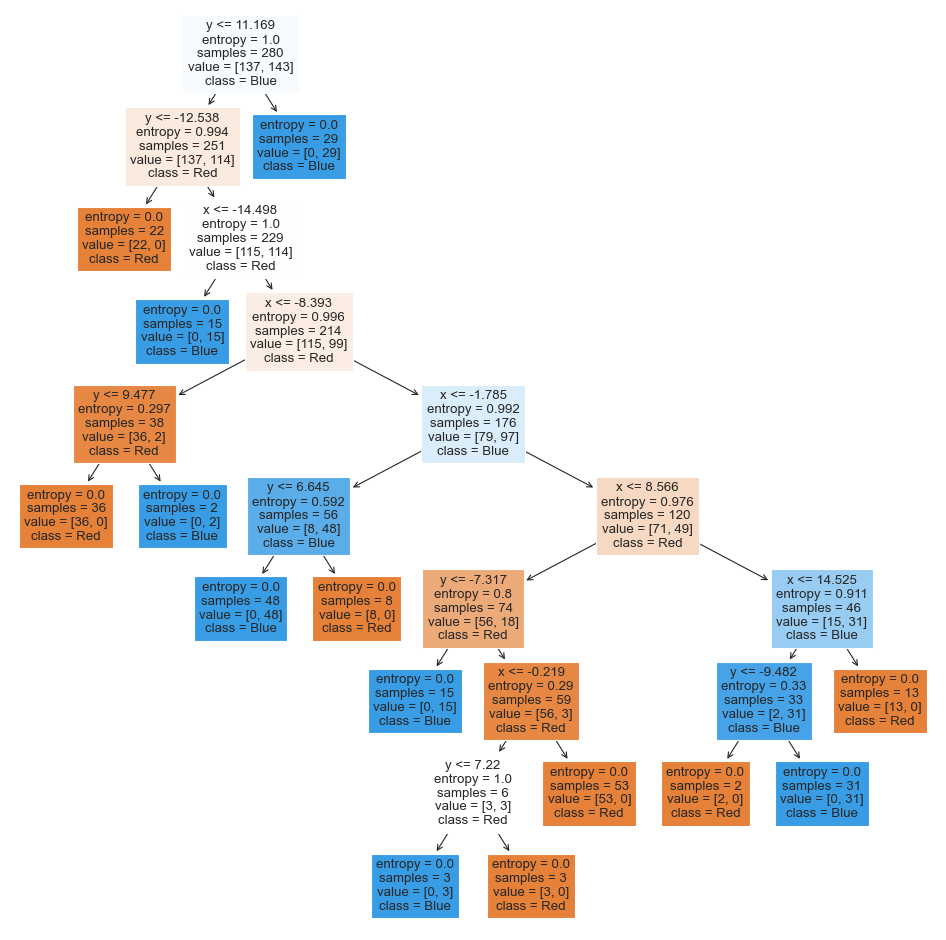

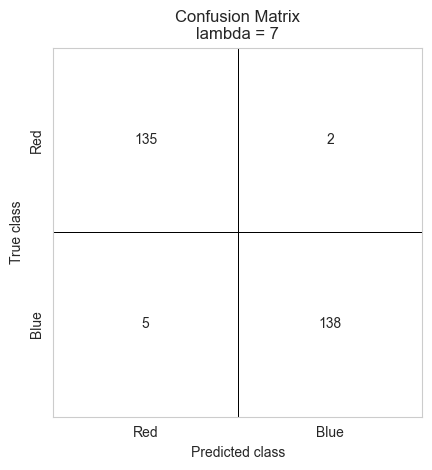

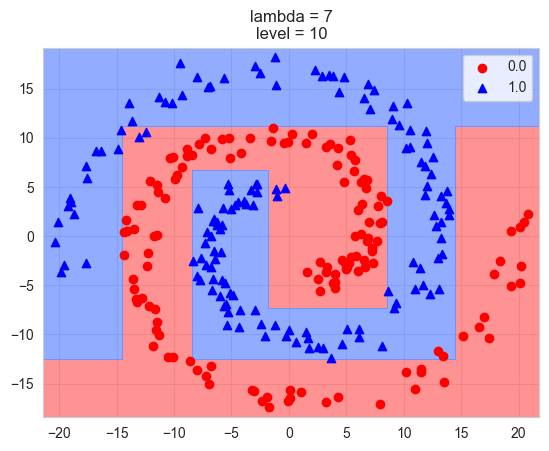

Accuracy:97.5%


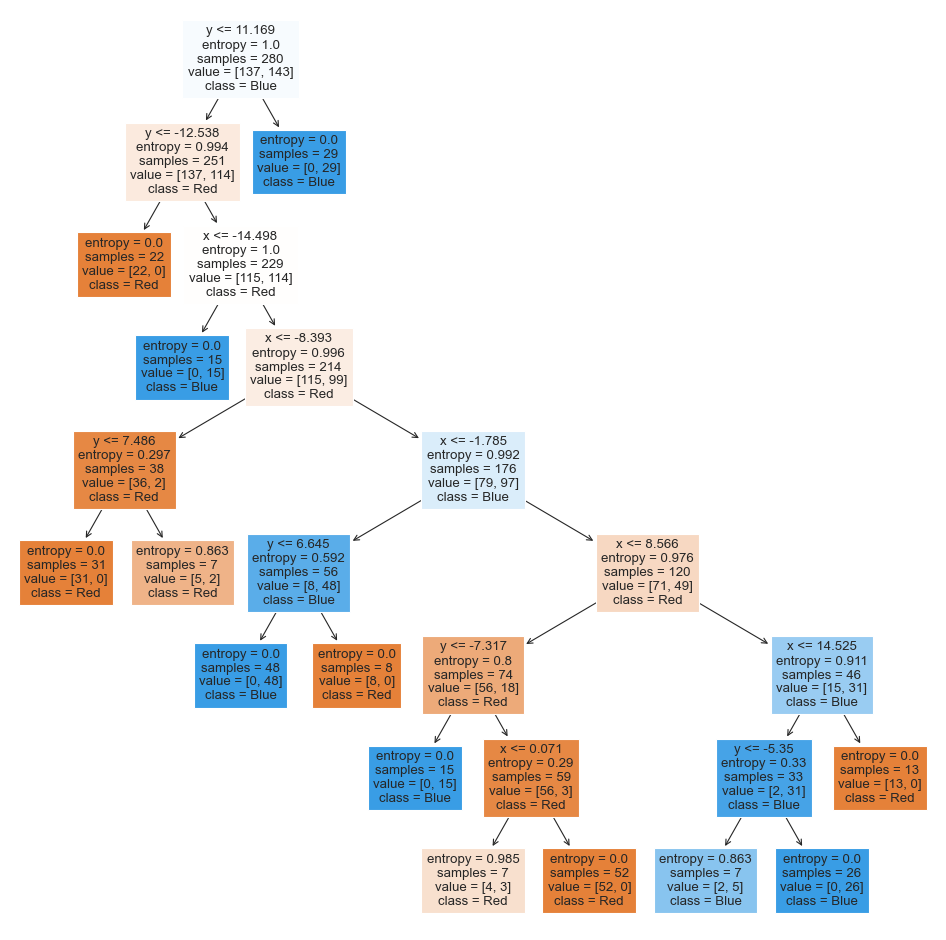

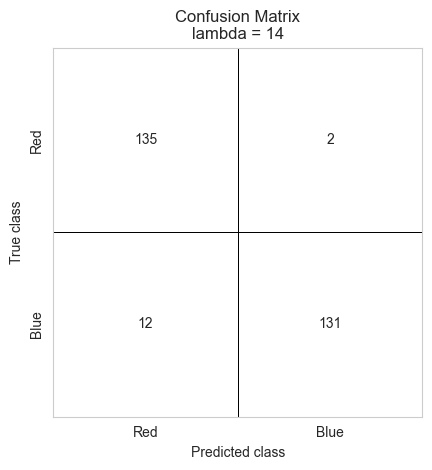

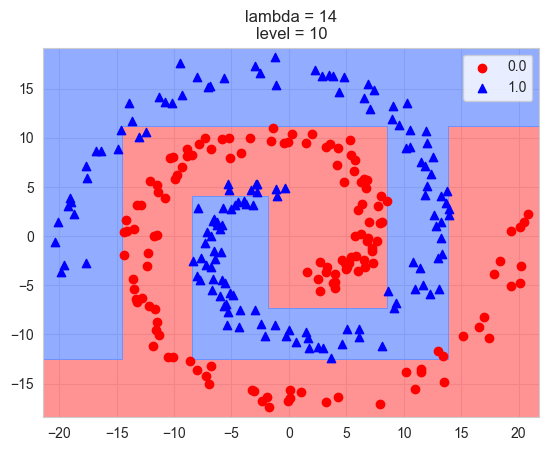

Accuracy:95.0%


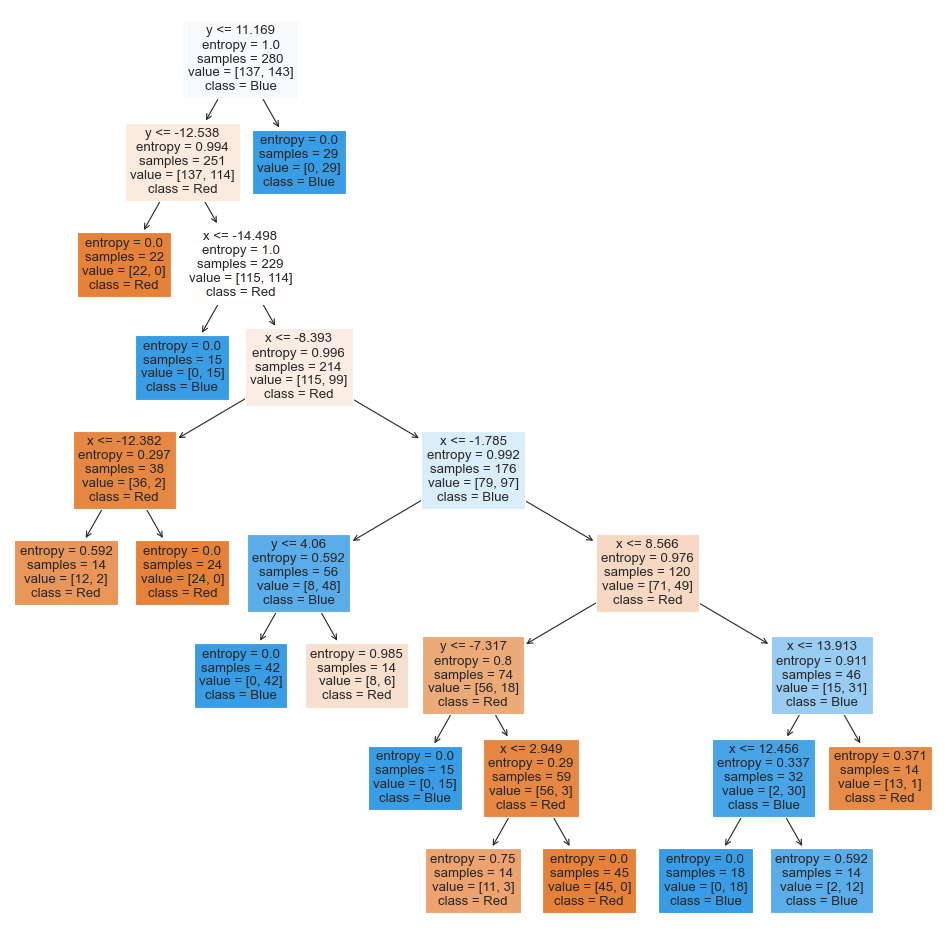

In [141]:
for l in [1, 2, 7, 14]:
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    # model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=10, min_samples_leaf=l)
    model = DecisionTreeClassifier(criterion = 'entropy', random_state=0,max_depth=10, min_samples_leaf=l)
    model.fit(X_train, y_train)
    
    test_predict = model.predict(X_train)
    
    conf_mat = confusion_matrix(y_train, test_predict)
    plot_confusion_matrix(conf_mat, ['Red', 'Blue'], l)
    
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    plt.contourf(X1,X2,predictions, alpha = 0.75, cmap = ListedColormap(('#ff6e6e', '#6e92ff')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    markers = ["o", "^"]
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], marker=markers[i],
                    c = ListedColormap(('red', 'blue'))(i), label = j)
    
    plt.title("lambda = " + str(l) + "\nlevel = 10")
    plt.legend()
    plt.show()
    
    print("Accuracy:" + str(accuracy_score(y_train, test_predict) * 100) + "%")
    
    figure(figsize=(15, 15), dpi=80)
    tree.plot_tree(model, class_names=['Red', 'Blue'], filled=True, feature_names=["x", "y"])
    plt.show()

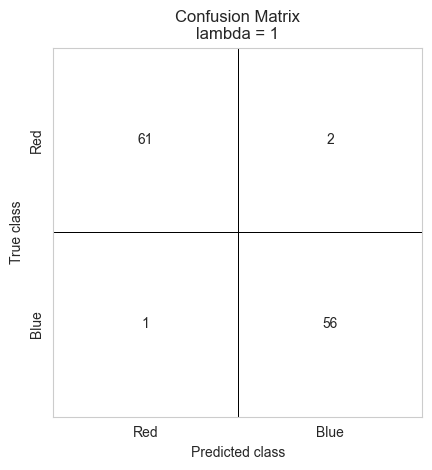

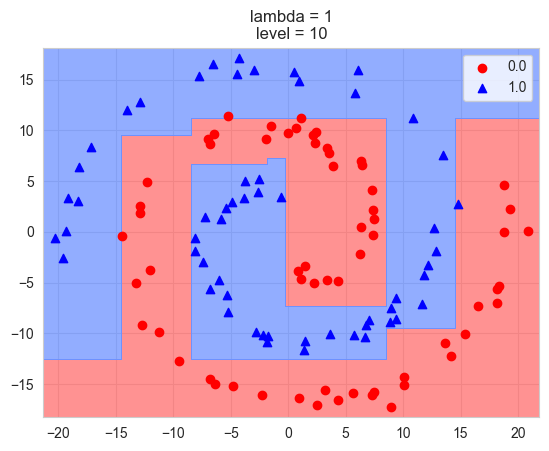

Accuracy:97.5%


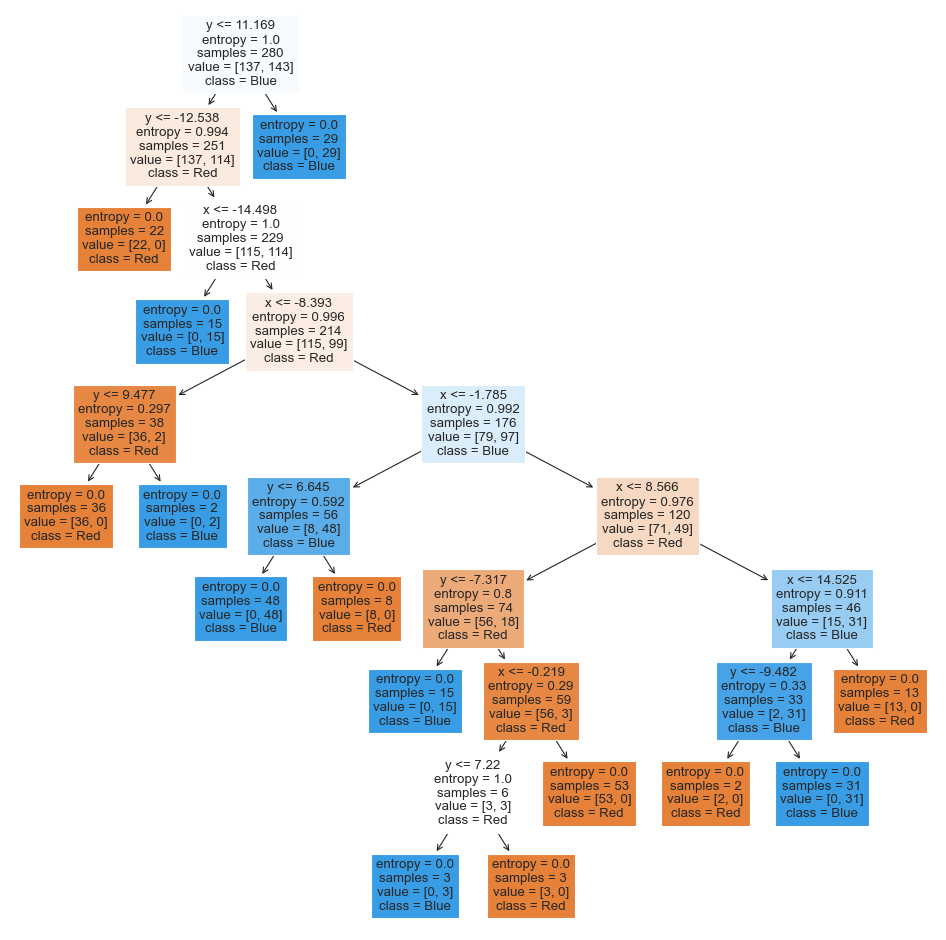

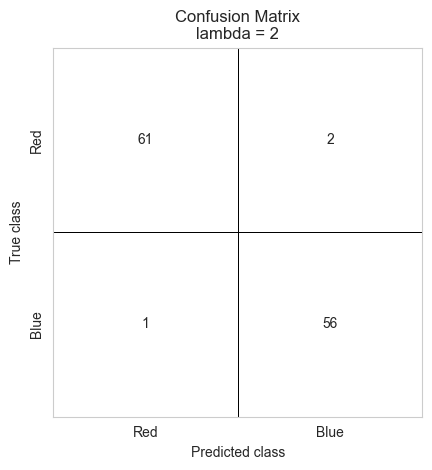

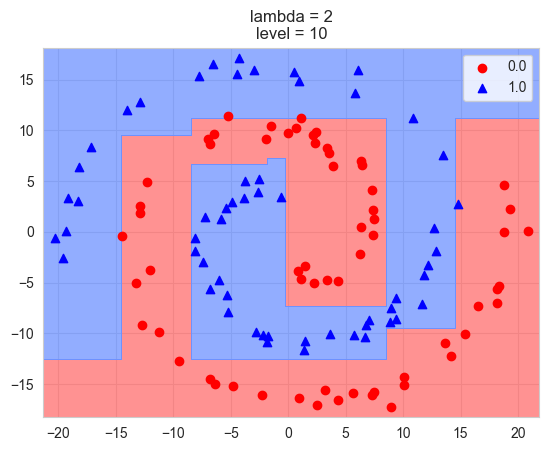

Accuracy:97.5%


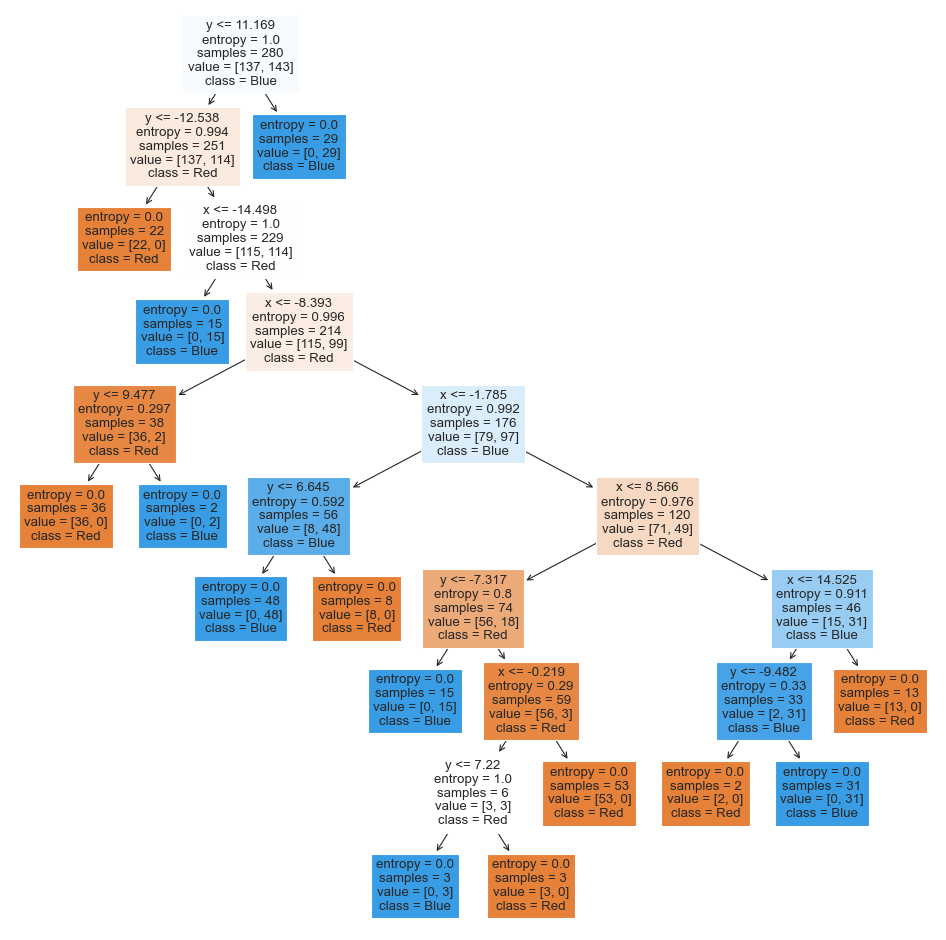

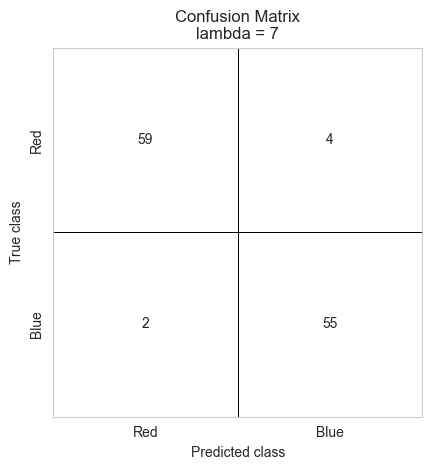

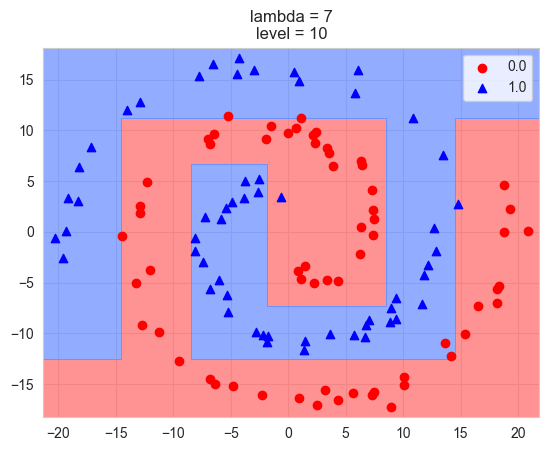

Accuracy:95.0%


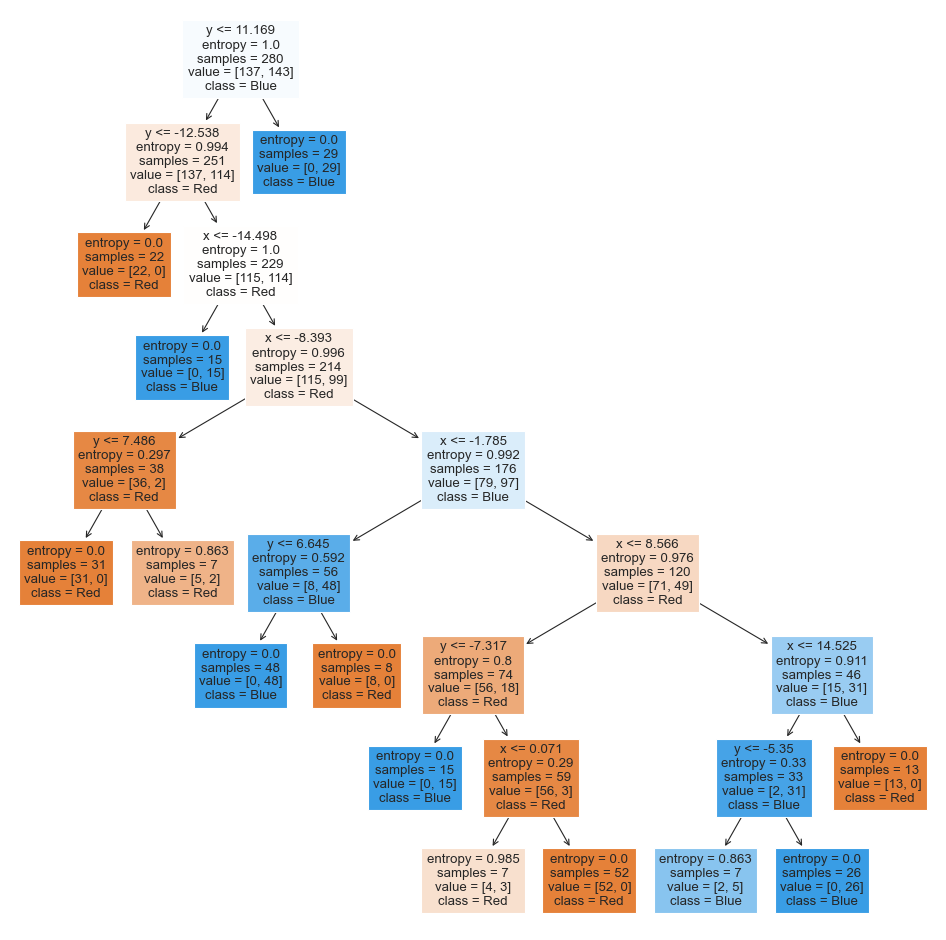

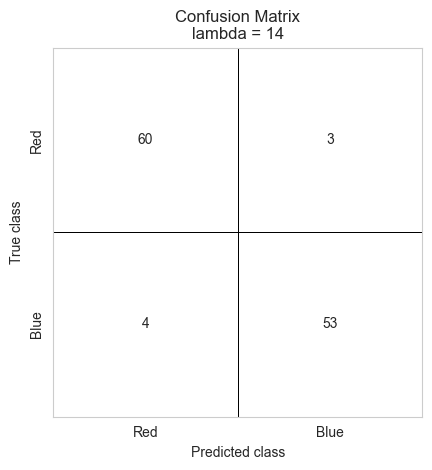

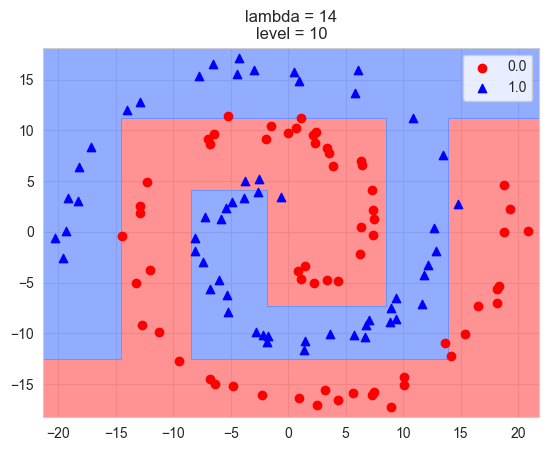

Accuracy:94.16666666666667%


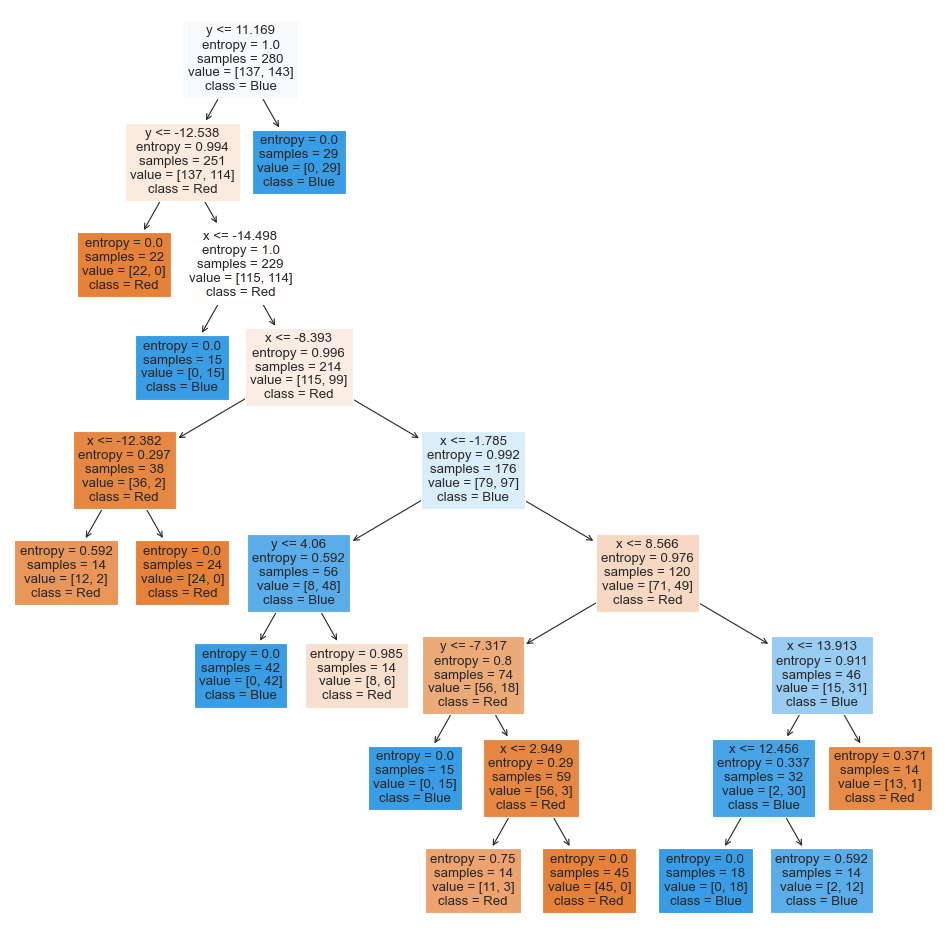

In [142]:
for l in [1, 2, 7, 14]:
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    # model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=10, min_samples_leaf=l)
    model = DecisionTreeClassifier(criterion = 'entropy', random_state=0,max_depth=10, min_samples_leaf=l)
    model.fit(X_train, y_train)
    
    test_predict = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, test_predict)
    plot_confusion_matrix(conf_mat, ['Red', 'Blue'], l)
    
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    plt.contourf(X1,X2,predictions, alpha = 0.75, cmap = ListedColormap(('#ff6e6e', '#6e92ff')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    markers = ["o", "^"]
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], marker=markers[i],
                    c = ListedColormap(('red', 'blue'))(i), label = j)
    
    plt.title("lambda = " + str(l) + "\nlevel = 10")
    plt.legend()
    plt.show()
    
    print("Accuracy:" + str(accuracy_score(y_test, test_predict) * 100) + "%")
    
    figure(figsize=(15, 15), dpi=80)
    tree.plot_tree(model, class_names=['Red', 'Blue'], filled=True, feature_names=["x", "y"])
    plt.show()